# PyTorch Workflow Fundamental Exercises

Exercise can be found on the [learnpytorch](https://www.learnpytorch.io/01_pytorch_workflow/#exercises) site.

## Set Up

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

torch.__version__

'1.12.1'

In [7]:
def device():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Selected device: {device}')
    return device

In [9]:
device()

Selected device: cpu


'cpu'

## Create a straight line dataset using the linear regression formula

In [44]:
# ofc these are never used, it is the goal
weight = 0.3
bias = 0.9

set_size = 100
training_size = 0.8
test_size = 0.2

training_split = int(training_size * set_size)

start = 0
end = 1
step = (end - start) / set_size # 0.01

learning_rate = 0.001
num_epochs = 1000

In [13]:
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x * bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.0000],
         [0.0027],
         [0.0054],
         [0.0081],
         [0.0108],
         [0.0135],
         [0.0162],
         [0.0189],
         [0.0216],
         [0.0243]]))

In [24]:
x_train, y_train = x[:training_split], y[:training_split]
x_test, y_test = x[training_split:], y[training_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

In [27]:
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data, and compares predictions.
    :param train_data:
    :param train_labels:
    :param test_data:
    :param test_labels:
    :param predictions:
    :return:
    """

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})

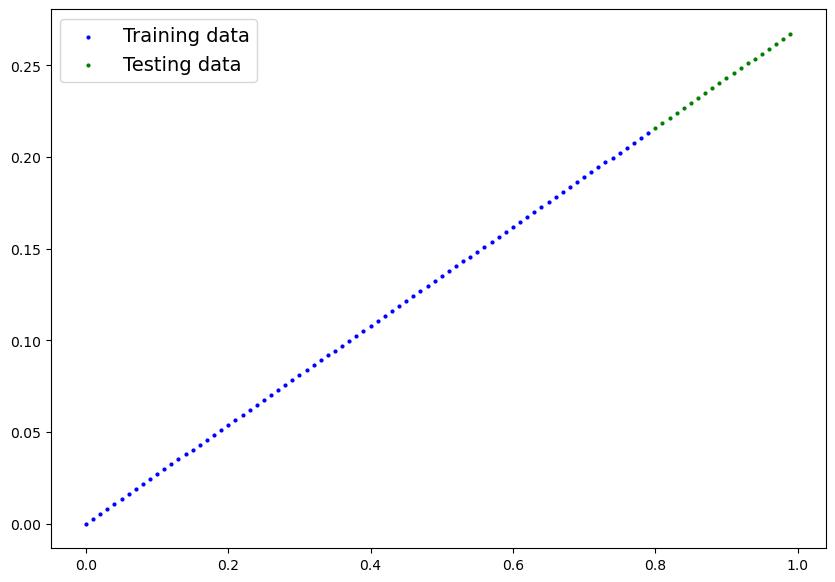

In [28]:
plot_predictions()

## Build a PyTorch model by subclassing nn.Module

In [51]:
class LinearRegressionModelV3(nn.Module):
        def __init__(self):
            super().__init__()
            self.layer = nn.Linear(1, 1)

        def forward(self, input: torch.Tensor) -> torch.Tensor:
            return self.layer(input)

In [52]:
linear_model = LinearRegressionModelV3()

linear_model.state_dict()

OrderedDict([('layer.weight', tensor([[0.7382]])),
             ('layer.bias', tensor([-0.9339]))])

In [34]:
linear_model.to(device())
next(linear_model.parameters()).device

x_train = x_train.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
x_test = x_test.to(device)

Selected device: cpu


device(type='cpu')

## Create a loss function and optimizer

In [59]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=linear_model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    linear_model.train()

    output = linear_model(x_train)
    loss = loss_fn(output, y_train)

    # Backward and optim
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        linear_model.eval()
        with torch.inference_mode():
            validation_output = linear_model(x_test)
            validation_loss = loss_fn(validation_output, y_test)

            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {validation_loss}")

Epoch: 0 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 20 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 40 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 60 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 80 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 100 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 120 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 140 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 160 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 180 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 200 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 220 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 240 | Loss: 0.007259660866111517 | Test loss: 0.0029375150334089994
Epoch: 260 | Loss: 0.0072596608

## Make predictions with the trained model on the test data

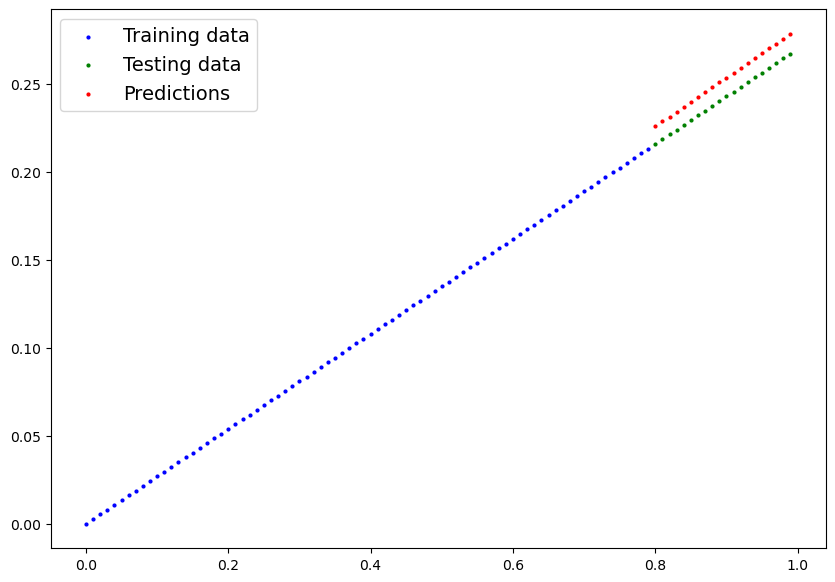

In [60]:
with torch.inference_mode():
    model_output = linear_model(x_test)

plot_predictions(predictions=model_output)

## Save your trained model's `state_dict()` to file

In [64]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_EX_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=linear_model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_EX_model_1.pth


In [65]:
!dir -l models

 Volume in drive C is OSDisk
 Volume Serial Number is 4818-509D

 Directory of C:\Users\msaey\DataspellProjects\Python_handbooks\Libraries\PyTorch\Exercices


 Directory of C:\Users\msaey\DataspellProjects\Python_handbooks\Libraries\PyTorch\Exercices\models

06/04/2023  12:16    <DIR>          .
06/04/2023  12:16    <DIR>          ..
06/04/2023  12:16             1.127 01_pytorch_workflow_EX_model_1.pth
06/04/2023  12:16             1.127 01_pytorch_workflow_model_1.pth
               2 File(s)          2.254 bytes
               2 Dir(s)  129.756.475.392 bytes free


File Not Found
